In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett
from scipy.stats import chi2
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis # Analise fatorial 
import pingouin as pg # Para o calculo da Correlação Policórica para as variavéis ordinais 
import umap

In [5]:
# Configurando e Carregando nossos dados
# Permite visualizar todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# Leitura dos dados
df = pd.read_csv(r"C:\Users\maype\Desktop\projetos\Trabalho Prático AM2\data\base_discretizada.csv")
df.head()


,Unnamed: 0,praticou_exercicio_12_meses,frequencia_consumo_alcool,consultou_medico_ultima_vez,procurou_atendimento_saude_2_semanas,frequencia_problemas_sono,fuma_produto_tabaco,diagnostico_hipertensao,substitui_almoco_por_lanche,percepcao_consumo_sal,dias_semana_consumo_refrigerante,dias_semana_consumo_leite,dias_semana_consumo_frango,dias_semana_consumo_suco_industrializado,dias_semana_consumo_carne_vermelha,dias_semana_consumo_frutas,dias_semana_consumo_suco_natural,dias_semana_consumo_doces,dias_semana_consumo_verduras_legumes,estado_geral_saude,imc_discretizado,doses_por_dia_consumo_alcool_discretizada
0,0,1.0,2.0,1.0,2.0,4.0,3.0,1.0,0.0,3.0,1.0,7.0,6.0,7.0,3.0,3.0,0.0,0.0,1.0,3.0,3,3
1,1,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,3.0,2.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,4.0,2.0,3,3
2,2,2.0,3.0,3.0,2.0,1.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,7.0,7.0,0.0,7.0,2.0,4,1
3,3,1.0,1.0,1.0,2.0,1.0,3.0,2.0,0.0,3.0,1.0,7.0,2.0,2.0,3.0,3.0,4.0,2.0,3.0,2.0,0,0
4,4,2.0,1.0,1.0,2.0,4.0,3.0,1.0,0.0,3.0,0.0,7.0,7.0,0.0,7.0,1.0,2.0,5.0,0.0,4.0,3,0


In [6]:
df = df.drop(columns= ['Unnamed: 0'])

In [7]:
df.head()

,praticou_exercicio_12_meses,frequencia_consumo_alcool,consultou_medico_ultima_vez,procurou_atendimento_saude_2_semanas,frequencia_problemas_sono,fuma_produto_tabaco,diagnostico_hipertensao,substitui_almoco_por_lanche,percepcao_consumo_sal,dias_semana_consumo_refrigerante,dias_semana_consumo_leite,dias_semana_consumo_frango,dias_semana_consumo_suco_industrializado,dias_semana_consumo_carne_vermelha,dias_semana_consumo_frutas,dias_semana_consumo_suco_natural,dias_semana_consumo_doces,dias_semana_consumo_verduras_legumes,estado_geral_saude,imc_discretizado,doses_por_dia_consumo_alcool_discretizada
0,1.0,2.0,1.0,2.0,4.0,3.0,1.0,0.0,3.0,1.0,7.0,6.0,7.0,3.0,3.0,0.0,0.0,1.0,3.0,3,3
1,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,3.0,2.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,4.0,2.0,3,3
2,2.0,3.0,3.0,2.0,1.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,7.0,7.0,0.0,7.0,2.0,4,1
3,1.0,1.0,1.0,2.0,1.0,3.0,2.0,0.0,3.0,1.0,7.0,2.0,2.0,3.0,3.0,4.0,2.0,3.0,2.0,0,0
4,2.0,1.0,1.0,2.0,4.0,3.0,1.0,0.0,3.0,0.0,7.0,7.0,0.0,7.0,1.0,2.0,5.0,0.0,4.0,3,0


In [8]:
df.columns

Index(['praticou_exercicio_12_meses', 'frequencia_consumo_alcool',
       'consultou_medico_ultima_vez', 'procurou_atendimento_saude_2_semanas',
       'frequencia_problemas_sono', 'fuma_produto_tabaco',
       'diagnostico_hipertensao', 'substitui_almoco_por_lanche',
       'percepcao_consumo_sal', 'dias_semana_consumo_refrigerante',
       'dias_semana_consumo_leite', 'dias_semana_consumo_frango',
       'dias_semana_consumo_suco_industrializado',
       'dias_semana_consumo_carne_vermelha', 'dias_semana_consumo_frutas',
       'dias_semana_consumo_suco_natural', 'dias_semana_consumo_doces',
       'dias_semana_consumo_verduras_legumes', 'estado_geral_saude',
       'imc_discretizado', 'doses_por_dia_consumo_alcool_discretizada'],
      dtype='object')

### Correlação Policórica

In [9]:
corr_policorica = pg.pcorr(df)
corr_policorica_matrix = corr_policorica.to_numpy()

In [10]:
corr_policorica

,praticou_exercicio_12_meses,frequencia_consumo_alcool,consultou_medico_ultima_vez,procurou_atendimento_saude_2_semanas,frequencia_problemas_sono,fuma_produto_tabaco,diagnostico_hipertensao,substitui_almoco_por_lanche,percepcao_consumo_sal,dias_semana_consumo_refrigerante,dias_semana_consumo_leite,dias_semana_consumo_frango,dias_semana_consumo_suco_industrializado,dias_semana_consumo_carne_vermelha,dias_semana_consumo_frutas,dias_semana_consumo_suco_natural,dias_semana_consumo_doces,dias_semana_consumo_verduras_legumes,estado_geral_saude,imc_discretizado,doses_por_dia_consumo_alcool_discretizada
praticou_exercicio_12_meses,1.000000,-0.044378,0.050916,0.025705,0.001896,-0.084197,-0.055717,-0.004897,0.001434,0.024794,0.001728,-0.011983,0.039313,0.027460,-0.097230,-0.028829,-0.010851,-0.059547,0.162614,0.008221,-0.016260
frequencia_consumo_alcool,-0.044378,1.000000,-0.015116,-0.027467,0.017198,-0.033848,-0.022824,0.016852,-0.016253,-0.011242,-0.016960,-0.033019,-0.016304,0.026781,0.030916,-0.047582,0.035060,0.065845,-0.074287,-0.004492,0.876547
consultou_medico_ultima_vez,0.050916,-0.015116,1.000000,0.155907,-0.053715,-0.047107,0.114059,-0.016585,-0.001582,0.020740,-0.021127,-0.015106,0.008983,0.006049,-0.048530,-0.000334,-0.018252,-0.043278,-0.045050,-0.010728,0.025562
procurou_atendimento_saude_2_semanas,0.025705,-0.027467,0.155907,1.000000,-0.108120,-0.003673,0.055062,-0.014818,-0.009301,0.016253,-0.005071,-0.003713,0.009594,0.012898,-0.041472,0.005793,-0.015422,-0.032130,-0.117952,-0.012338,0.032287
frequencia_problemas_sono,0.001896,0.017198,-0.053715,-0.108120,1.000000,-0.027561,-0.058078,0.041848,-0.011944,-0.007478,-0.007439,0.001025,0.000071,-0.036027,0.008475,-0.004286,0.028810,0.011054,0.209339,0.008354,-0.010433
fuma_produto_tabaco,-0.084197,-0.033848,-0.047107,-0.003673,-0.027561,1.000000,0.006984,-0.013372,-0.009883,-0.032455,0.054035,0.009802,-0.045817,-0.020585,0.060925,0.028857,0.025819,-0.013327,-0.059705,0.078137,-0.043658
diagnostico_hipertensao,-0.055717,-0.022824,0.114059,0.055062,-0.058078,0.006984,1.000000,0.021221,-0.116380,0.031756,-0.025498,-0.003859,0.028004,0.008511,-0.048901,0.037132,0.026348,-0.037556,-0.175742,-0.176363,0.035728
substitui_almoco_por_lanche,-0.004897,0.016852,-0.016585,-0.014818,0.041848,-0.013372,0.021221,1.000000,-0.063807,0.147485,0.000323,0.008629,0.044011,-0.022507,-0.006891,0.007223,0.110298,-0.069320,-0.031749,0.008328,0.000392
percepcao_consumo_sal,0.001434,-0.016253,-0.001582,-0.009301,-0.011944,-0.009883,-0.116380,-0.063807,1.000000,-0.086982,0.019853,0.019793,-0.033885,-0.081181,0.050311,0.020548,-0.049014,0.029326,0.029604,-0.019875,-0.013178
dias_semana_consumo_refrigerante,0.024794,-0.011242,0.020740,0.016253,-0.007478,-0.032455,0.031756,0.147485,-0.086982,1.000000,-0.015866,0.044964,0.082410,0.133802,-0.072294,-0.042391,0.167801,-0.027886,-0.050754,0.023178,0.032011


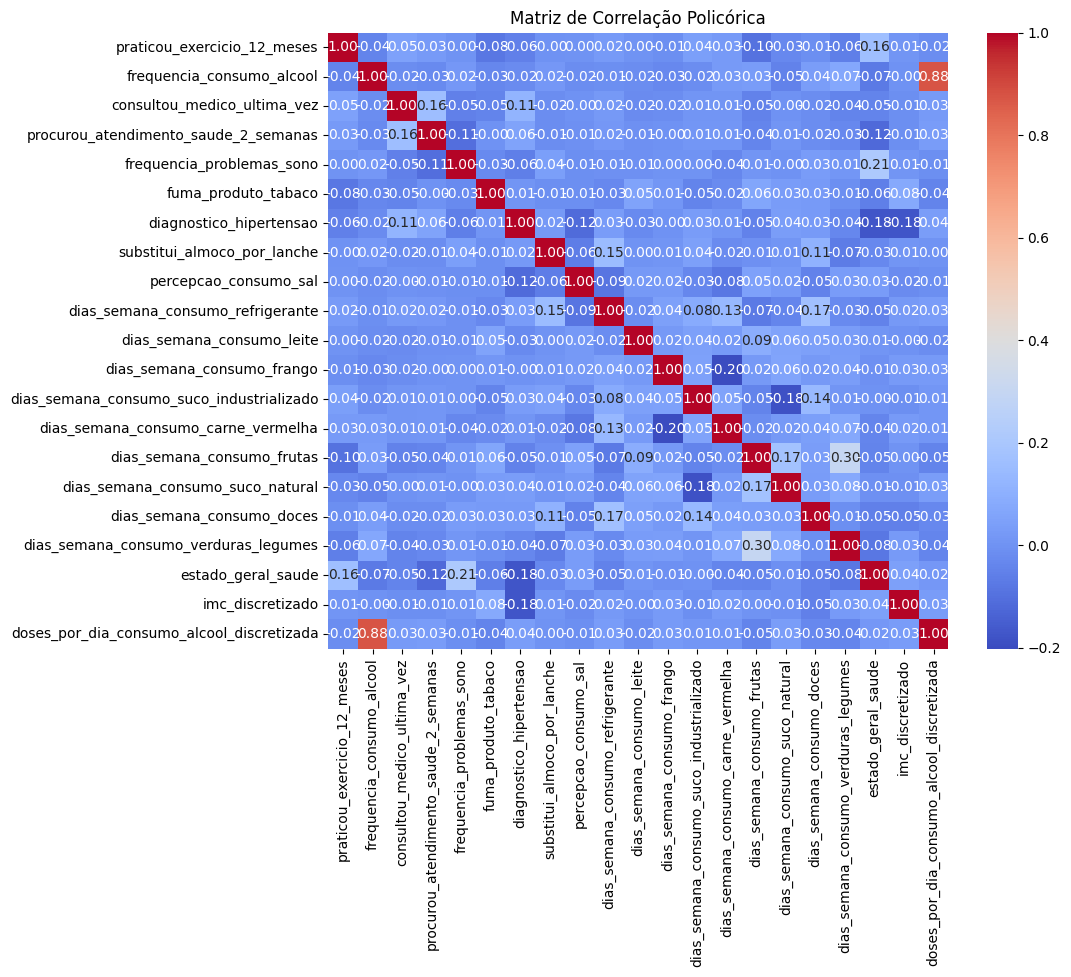

In [11]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_policorica, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Matriz de Correlação Policórica")
plt.show()

## Aplicando a Analise Fatorial sobre a matriz de correlação policórica

>Primeiro vamos realizar um teste aleátorio aplicando para 2 fatores

In [12]:
fa = FactorAnalysis(n_components=2, random_state=42)  # Reduzindo para 2 fatores
fatores = fa.fit_transform(corr_policorica_matrix)

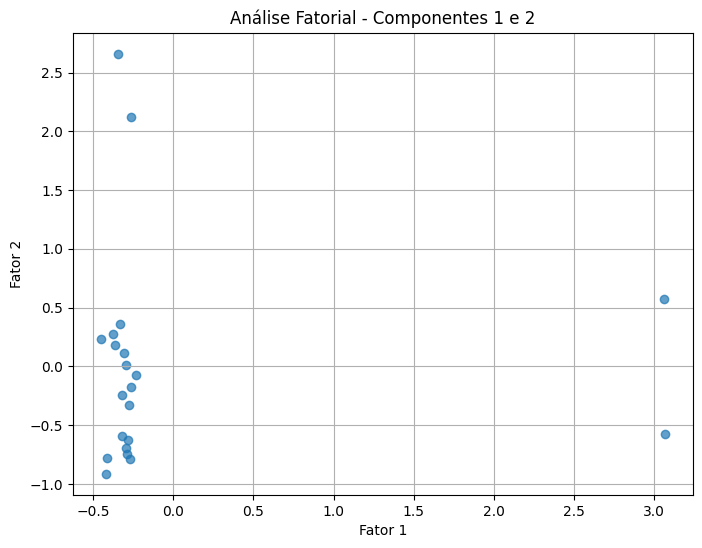

In [13]:
#Plotando os Fatores 
plt.figure(figsize=(8, 6))
plt.scatter(fatores[:, 0], fatores[:, 1], alpha=0.7)

# Configuração do gráfico
plt.title("Análise Fatorial - Componentes 1 e 2")
plt.xlabel("Fator 1")
plt.ylabel("Fator 2")
plt.grid(True)
plt.show()

### Calculando o KMO e Bartlett para varificar a possibilidade de utilizar a análise de fatores

In [14]:
# Calcular o KMO
kmo_all, kmo_model = calculate_kmo(df)
print(f'KMO: {kmo_model}')

KMO: 0.6321891423933695


In [15]:
# Teste de Esfericidade de Bartlett
# Verificando a matriz de correlação
corr_matrix = np.corrcoef(df, rowvar=False)

In [16]:
# Realizando o teste de Bartlett
chi2_stat, p_value = bartlett(*[df.iloc[:, i] for i in range(df.shape[1])])
print(f"Teste de Bartlett - Chi2: {chi2_stat}, p-value: {p_value}")

# Interpretação dos resultados
if p_value < 0.05:
    print("O Teste de Bartlett indica que os dados são adequados para FA.")
else:
    print("O Teste de Bartlett não indica adequação para FA.")

Teste de Bartlett - Chi2: 849015.2204223314, p-value: 0.0
O Teste de Bartlett indica que os dados são adequados para FA.


## Aplicando o Método do Cotovelo e o Parallel Analysis para verificar o numero ideal de fatores

> Método do Cotovelo


In [17]:
# Aplicando FA com o número máximo de fatores
fa = FactorAnalyzer(n_factors=df.shape[1], rotation='varimax')
fa.fit(df)

# Obtendo os eigenvalues
eigenvalues = fa.get_eigenvalues()

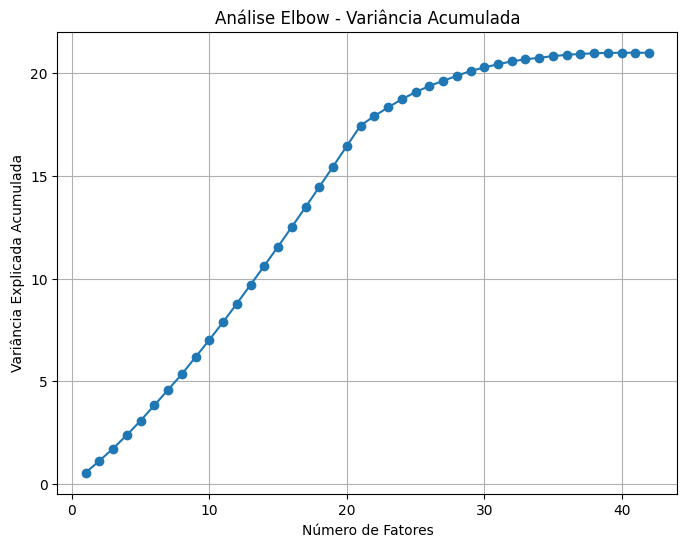

In [18]:
# Plotando a variância explicada acumulada
explained_variance = eigenvalues / sum(eigenvalues)  # Variância explicada por cada fator
cumulative_variance = explained_variance.cumsum()  # Variância acumulada

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Análise Elbow - Variância Acumulada')
plt.xlabel('Número de Fatores')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

> Parallel Analysis

In [19]:
# Função para Parallel Analysis
def parallel_analysis(real_data, n_iterations=100):
    # Número de fatores/fatores que queremos manter (com base nos dados reais)
    n_fatores = real_data.shape[1]
    
    # Realizando a Análise PCA nos dados reais
    pca = PCA(n_components=n_fatores)
    pca.fit(real_data)
    
    # Eigenvalues dos dados reais
    eigenvalues_real = pca.explained_variance_

    # Gerando dados aleatórios com a mesma forma dos dados reais
    eigenvalues_random = np.zeros((n_iterations, n_fatores))
    for i in range(n_iterations):
        random_data = np.random.normal(size=real_data.shape)
        pca.fit(random_data)
        eigenvalues_random[i, :] = pca.explained_variance_
    
    # Calculando o valor médio dos eigenvalues dos dados aleatórios
    mean_eigenvalues_random = np.mean(eigenvalues_random, axis=0)
    
    return eigenvalues_real, mean_eigenvalues_random

In [20]:
# Aplicar a Parallel Analysis
eigenvalues_real, mean_eigenvalues_random = parallel_analysis(df)

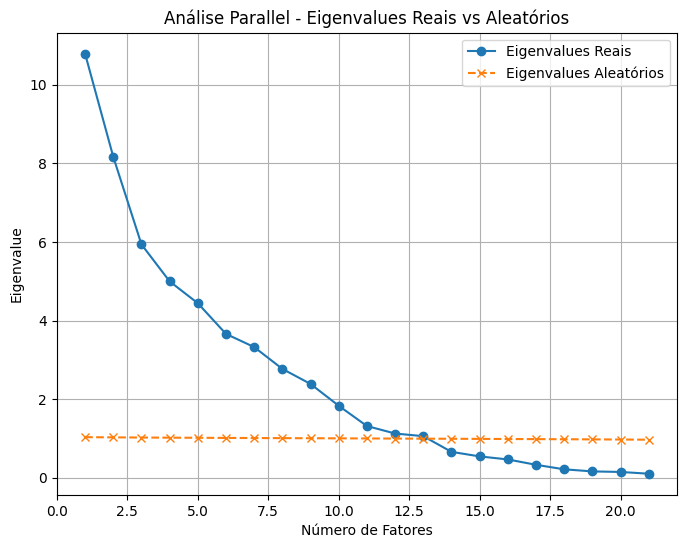

In [21]:
# Plotando os eigenvalues reais vs aleatórios
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues_real) + 1), eigenvalues_real, marker='o', label="Eigenvalues Reais")
plt.plot(range(1, len(mean_eigenvalues_random) + 1), mean_eigenvalues_random, marker='x', label="Eigenvalues Aleatórios", linestyle='--')
plt.title('Análise Parallel - Eigenvalues Reais vs Aleatórios')
plt.xlabel('Número de Fatores')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Verificando o número de fatores a serem mantidos
num_fatores_ideais = np.sum(eigenvalues_real > mean_eigenvalues_random)
print(f'O número ideal de fatores é: {num_fatores_ideais}')

O número ideal de fatores é: 13


## Aplicando analise de fatores utilizando resultados do Método do Cotovelo

In [23]:
# Aplicar a análise fatorial com 21 fatores
fa_el = FactorAnalyzer(n_factors=21, rotation="varimax", method="minres")
fa_el.fit(df)

FactorAnalyzer(n_factors=21, rotation='varimax', rotation_kwargs={})

In [24]:
# Mostrar a variância explicada por cada fator (eigenvalues)
print("Eigenvalues (variância explicada por cada fator):")
print(fa_el.get_eigenvalues())

Eigenvalues (variância explicada por cada fator):
(array([2.46913826, 1.92999815, 1.62270187, 1.43524748, 1.17424053,
       1.06594929, 1.0464674 , 0.99880862, 0.92673748, 0.89182404,
       0.85666652, 0.8272624 , 0.78972039, 0.78097427, 0.75657656,
       0.72648274, 0.70089859, 0.66535112, 0.62614228, 0.59735259,
       0.11145942]), array([ 2.10238710e+00,  1.40660571e+00,  1.08161234e+00,  7.49766433e-01,
        5.03587938e-01,  3.61790441e-01,  3.32834316e-01,  3.13004170e-01,
        1.89115017e-01,  1.68396884e-01,  1.39151916e-01,  8.79149848e-02,
        7.10494559e-02,  6.35023550e-02,  5.23988025e-02,  3.23227112e-02,
        2.49613639e-02,  1.17857857e-02,  3.97932212e-03,  1.02769677e-03,
       -8.70717958e-07]))


In [25]:
# Obter as cargas dos fatores (fatores x variáveis)
fatores = fa_el.loadings_
print("Cargas dos fatores:")
print(fatores)

Cargas dos fatores:
[[-1.07267822e-01 -1.58780515e-01  9.74190743e-02 -6.60666424e-02
   5.83346515e-02 -2.64809114e-02  4.57945579e-02 -9.00117131e-03
  -1.69914531e-02  4.23308728e-01 -1.24915560e-02  1.68799238e-02
  -1.13627562e-01  7.44569161e-03 -4.37731116e-03  1.79077582e-03
  -9.60205215e-03  6.83973480e-04  1.63655762e-04  1.28365834e-03
   0.00000000e+00]
 [ 9.30759330e-01  4.71780875e-02 -4.67353616e-02 -2.50180341e-02
   1.83598438e-02 -5.75993449e-02  7.36434607e-03  3.44232296e-02
   5.76858234e-02 -8.42065374e-02  4.13065780e-02  9.34454745e-03
  -7.07534571e-02 -7.37267280e-02 -2.54889218e-02 -5.54818940e-03
  -3.99132806e-02 -2.03992390e-02 -5.00035429e-02 -7.29909273e-03
   0.00000000e+00]
 [ 2.63136041e-02 -7.92228367e-02 -8.47392821e-02 -1.79792057e-02
   4.68932654e-01 -2.62238129e-02 -5.93541614e-02 -2.61727980e-04
   3.42899367e-02  3.80870236e-02 -4.74811686e-03  2.05507611e-02
  -5.87975932e-02 -4.88483397e-02  4.43302396e-02 -5.43428432e-03
   2.07909056e-04 

In [26]:
# Mostrar a variância explicada total
variancia_explicada = fa_el.get_factor_variance()
print("Variância explicada por cada fator e variância acumulada:")
print(variancia_explicada)

Variância explicada por cada fator e variância acumulada:
(array([1.79484703, 0.82447675, 0.60321606, 0.57114168, 0.51851805,
       0.48481947, 0.44634916, 0.4222609 , 0.36710866, 0.34156182,
       0.33340002, 0.2926616 , 0.22960842, 0.22255385, 0.07906767,
       0.0679291 , 0.04630354, 0.04414926, 0.00505484, 0.002166  ,
       0.        ]), array([0.08546891, 0.0392608 , 0.02872457, 0.02719722, 0.02469134,
       0.02308664, 0.02125472, 0.02010766, 0.01748136, 0.01626485,
       0.01587619, 0.01393627, 0.01093373, 0.0105978 , 0.00376513,
       0.00323472, 0.00220493, 0.00210235, 0.00024071, 0.00010314,
       0.        ]), array([0.08546891, 0.1247297 , 0.15345428, 0.1806515 , 0.20534284,
       0.22842948, 0.2496842 , 0.26979186, 0.28727323, 0.30353808,
       0.31941427, 0.33335053, 0.34428427, 0.35488207, 0.3586472 ,
       0.36188192, 0.36408685, 0.36618919, 0.3664299 , 0.36653304,
       0.36653304]))


## Análise dos Resultados da Análise Fatorial com 21 Fatores

### Eigenvalues (Variância Explicada por Cada Fator)
Os eigenvalues representam a variância explicada por cada fator extraído durante a análise fatorial. Para os 21 fatores extraídos, a maior parte da variância é explicada pelos primeiros fatores, com valores de eigenvalue superiores a 1, como observado nos primeiros 5 fatores (valores como 2.47, 1.93, 1.62, 1.43 e 1.17). Esses fatores representam as dimensões principais da variabilidade dos dados.

Nos fatores subsequentes, a variância explicada diminui consideravelmente, com eigenvalues abaixo de 1, indicando que esses fatores explicam menos da variação total. A partir do 19º fator, os eigenvalues se aproximam de zero, sugerindo que esses fatores são menos relevantes para a explicação dos dados.

### Cargas dos Fatores
As cargas fatoriais indicam o grau de associação entre cada variável original e os fatores extraídos. Em geral, as cargas maiores (em módulo) indicam que as variáveis estão mais fortemente associadas a um fator específico. A seguir, são observados alguns pontos importantes sobre as cargas fatoriais:

- **Fator 1** tem várias cargas significativas, especialmente na variável associada à carga \( 0.4233 \), sugerindo que este fator pode ser relacionado a características centrais ou comuns entre várias variáveis.
- **Fator 2** apresenta uma forte carga positiva para algumas variáveis, como \( 0.913 \), que indica que essas variáveis têm uma relação forte com esse fator.
- **Fatores 3 a 5** também apresentam várias variáveis associadas a altas cargas, indicando que eles podem estar refletindo diferentes dimensões subjacentes do conjunto de dados.
  
Observando os fatores a partir do sexto, as cargas começam a diminuir, indicando uma menor contribuição dessas variáveis na formação dos fatores. Fatores mais altos apresentam muitas cargas próximas de zero, sugerindo que essas dimensões têm pouca relevância ou estão relacionadas a ruídos ou variações menores nos dados.

### Interpretação
A análise fatorial revelou que a maior parte da variabilidade dos dados é explicada por um número relativamente pequeno de fatores (em torno dos 5 primeiros). A explicação da variância diminui rapidamente à medida que mais fatores são extraídos, e a partir do 19º fator, os fatores se tornam quase irrelevantes.

Esses resultados sugerem que, apesar de se ter extraído 21 fatores, apenas os primeiros fatores têm um impacto significativo na estrutura subjacente dos dados. Considerando isso, uma abordagem de redução de dimensionalidade utilizando esses primeiros fatores pode ser mais eficaz e representativa para a análise posterior ou para a aplicação de algoritmos de clusterização.

## Aplicando analise de fatores utilizando resultados do método Parallel Analysis

In [27]:
# Aplicar a análise fatorial com 13 fatores
fa = FactorAnalyzer(n_factors=13, rotation="varimax", method="minres")
fa.fit(df)

FactorAnalyzer(n_factors=13, rotation='varimax', rotation_kwargs={})

In [28]:
# Mostrar a variância explicada por cada fator (eigenvalues)
print("Eigenvalues (variância explicada por cada fator):")
print(fa.get_eigenvalues())

Eigenvalues (variância explicada por cada fator):
(array([2.46913826, 1.92999815, 1.62270187, 1.43524748, 1.17424053,
       1.06594929, 1.0464674 , 0.99880862, 0.92673748, 0.89182404,
       0.85666652, 0.8272624 , 0.78972039, 0.78097427, 0.75657656,
       0.72648274, 0.70089859, 0.66535112, 0.62614228, 0.59735259,
       0.11145942]), array([ 2.13838026e+00,  1.47278928e+00,  1.21809072e+00,  1.06532818e+00,
        6.76296419e-01,  5.86629767e-01,  5.10891203e-01,  4.08908916e-01,
        3.26030777e-01,  2.53515755e-01,  1.87527708e-01,  1.39615184e-01,
        1.13805366e-01,  1.31202126e-02,  8.39206690e-03,  3.38260579e-03,
        1.05107170e-03, -1.62416306e-03, -3.73470277e-03, -7.63173915e-03,
       -1.29584559e-02]))


In [29]:
# Obter as cargas dos fatores (fatores x variáveis)
fatores = fa.loadings_
print("Cargas dos fatores:")
print(fatores)

Cargas dos fatores:
[[-9.99213111e-02 -4.77741261e-02 -1.11428750e-02 -5.09049674e-03
   3.10182411e-02 -1.21766464e-01 -6.74187104e-02  5.76366565e-02
   4.25912163e-01 -1.50617494e-02  2.83064157e-02 -8.23838707e-03
  -2.46222825e-02]
 [ 9.13553743e-01  7.22942641e-03  1.24806366e-02  2.03340219e-02
   1.01931083e-01  4.39664714e-02 -2.61126480e-02  2.44039920e-02
  -1.18546985e-01 -3.79952121e-02 -1.17835979e-02 -6.93468140e-02
  -3.17246086e-02]
 [ 2.98951426e-02  7.63175927e-02 -6.02395605e-03 -3.59450744e-03
   5.40852540e-02 -6.56838025e-02 -1.62700418e-02  4.03920824e-01
   5.08120155e-02 -1.74833662e-02 -4.90243451e-02 -5.12154321e-02
  -7.35703669e-02]
 [ 1.59601528e-02  2.61787103e-02 -8.24640424e-04 -2.16428366e-03
   5.32818736e-02 -4.31945562e-02 -1.09390473e-02  4.72456039e-01
  -4.52581034e-02 -7.89997607e-03 -1.21972276e-01 -7.20825565e-03
  -1.79980514e-02]
 [-4.01818421e-03 -4.36676517e-02  9.72856886e-03  2.38834622e-02
  -3.27568600e-02  1.86485715e-03 -4.30983091e

In [30]:
# Mostrar a variância explicada total
variancia_explicada = fa.get_factor_variance()
print("Variância explicada por cada fator e variância acumulada:")
print(variancia_explicada)

Variância explicada por cada fator e variância acumulada:
(array([1.7839134 , 0.92640525, 0.89945085, 0.76626034, 0.76173492,
       0.76171399, 0.62178665, 0.56604877, 0.56415704, 0.5160288 ,
       0.3835452 , 0.27983377, 0.26692745]), array([0.08494826, 0.04411454, 0.04283099, 0.03648859, 0.03627309,
       0.03627209, 0.02960889, 0.0269547 , 0.02686462, 0.0245728 ,
       0.01826406, 0.01332542, 0.01271083]), array([0.08494826, 0.12906279, 0.17189379, 0.20838237, 0.24465546,
       0.28092756, 0.31053645, 0.33749115, 0.36435577, 0.38892857,
       0.40719263, 0.42051805, 0.43322888]))


### **Análise dos Resultados da Parallel Analysis (13 Fatores Extraídos)**

A seguir, vamos realizar a análise dos resultados da Parallel Analysis para os 13 fatores extraídos. Para isso, vamos observar três aspectos principais: **Autovalores (Eigenvalues)**, **Cargas dos Fatores** e **Variância Explicada**.

#### 1. **Autovalores (Eigenvalues)**

Os autovalores indicam a quantidade de variância explicada por cada fator. Consideramos os fatores com autovalores superiores a 1 como significativos, de acordo com a regra de Kaiser.

Os 13 autovalores extraídos foram:

- Fatores 1 a 13: [2.469, 1.930, 1.623, 1.435, 1.174, 1.066, 1.046, 0.999, 0.927, 0.892, 0.857, 0.827, 0.790]

Os fatores 1 a 13 possuem autovalores acima de 1, indicando que todos os 13 fatores extraídos são significativos, ou seja, eles explicam uma quantidade relevante da variância nos dados. 

#### 2. **Cargas dos Fatores**

As **cargas dos fatores** representam a correlação entre as variáveis originais e os fatores extraídos. Cargas absolutas maiores indicam que a variável tem uma contribuição significativa para o fator correspondente.

Aqui estão as cargas dos fatores para os 13 fatores extraídos (valores de cada variável por fator):

**Fator 1**:
- Variáveis: [-0.0999, 0.9135, 0.0299, 0.0159, -0.004, ...]

**Fator 2**:
- Variáveis: [0.0914, 0.0072, 0.0763, 0.0262, -0.0437, ...]

**Fator 3**:
- Variáveis: [0.0299, 0.0763, -0.0060, -0.0035, ...]

Cada linha aqui mostra as cargas das variáveis no fator correspondente. Observando as variáveis que possuem cargas mais altas, podemos concluir quais são mais representativas para cada fator. Por exemplo, o **Fator 2** tem uma carga de **0.9135** para a segunda variável, indicando uma forte associação entre elas.

#### 3. **Variância Explicada por Fator**

A **variância explicada** por cada fator e a **variância acumulada** são fundamentais para entender o impacto de cada fator no modelo. A variância explicada por fator mostra quanto de toda a variância nos dados é explicada por cada fator.

Aqui estão os valores:

**Variância Explicada por Fator**:
- Fator 1: 1.7839
- Fator 2: 0.9264
- Fator 3: 0.8994
- Fator 4: 0.7663
- Fator 5: 0.7617
- Fator 6: 0.7617
- Fator 7: 0.6218
- Fator 8: 0.5660
- Fator 9: 0.5642
- Fator 10: 0.5160
- Fator 11: 0.3835
- Fator 12: 0.2798
- Fator 13: 0.2669

**Variância Acumulada** (em porcentagem):
- Após o Fator 1: **8.49%**
- Após o Fator 2: **12.91%**
- Após o Fator 3: **17.19%**
- Após o Fator 4: **20.84%**
- Após o Fator 5: **24.47%**
- Após o Fator 6: **28.09%**
- Após o Fator 7: **31.05%**
- Após o Fator 8: **33.75%**
- Após o Fator 9: **36.44%**
- Após o Fator 10: **38.89%**
- Após o Fator 11: **40.72%**
- Após o Fator 12: **42.05%**
- Após o Fator 13: **43.32%**

**Observação**:
- A maior parte da variância é explicada pelos primeiros fatores. Os primeiros 4 fatores explicam cerca de **20.84%** da variância, e os primeiros 6 fatores explicam **28.09%**.
- A contribuição dos fatores diminui significativamente a partir do **Fator 7**, e os fatores a partir deste ponto explicam menos de **3%** da variância total.

### **Conclusões**

1. **Significância dos Fatores**:
   - Todos os 13 fatores extraídos são significativos, com base no critério de autovalores superiores a 1.
   
2. **Contribuição dos Fatores**:
   - Os fatores mais significativos são os primeiros, com o **Fator 1** explicando a maior parte da variância.
   - A contribuição dos fatores diminui conforme avançamos na ordem dos fatores extraídos, com os últimos fatores tendo uma explicação muito menor da variância.

3. **Relevância dos Fatores**:
   - A análise das **cargas dos fatores** pode ajudar a interpretar quais variáveis estão mais associadas aos fatores extraídos. Variáveis com cargas absolutas mais altas devem ser observadas mais atentamente para entender o papel de cada fator.

4. **Escolha de Fatores**:
   - A escolha de quantos fatores manter pode depender do objetivo da análise. Com base na variância acumulada, pode-se decidir manter os primeiros fatores que explicam a maior parte da variância, descartando os fatores subsequentes que têm uma contribuição menor.


In [31]:
# Obter as cargas fatoriais
loadings = fa.loadings_

# Visualizar as cargas fatoriais
loadings_df = pd.DataFrame(loadings, columns=[f'Fator_{i+1}' for i in range(loadings.shape[1])], index=df.columns)
print(loadings_df)

                                            Fator_1   Fator_2   Fator_3  \
praticou_exercicio_12_meses               -0.099921 -0.047774 -0.011143   
frequencia_consumo_alcool                  0.913554  0.007229  0.012481   
consultou_medico_ultima_vez                0.029895  0.076318 -0.006024   
procurou_atendimento_saude_2_semanas       0.015960  0.026179 -0.000825   
frequencia_problemas_sono                 -0.004018 -0.043668  0.009729   
fuma_produto_tabaco                       -0.152006  0.044837  0.033033   
diagnostico_hipertensao                    0.030958  0.934488  0.014868   
substitui_almoco_por_lanche                0.028683  0.016263  0.065089   
percepcao_consumo_sal                     -0.061201 -0.100486 -0.036224   
dias_semana_consumo_refrigerante           0.045708  0.006638  0.119648   
dias_semana_consumo_leite                 -0.060239 -0.014741  0.028204   
dias_semana_consumo_frango                -0.014293 -0.004768  0.016023   
dias_semana_consumo_suco_

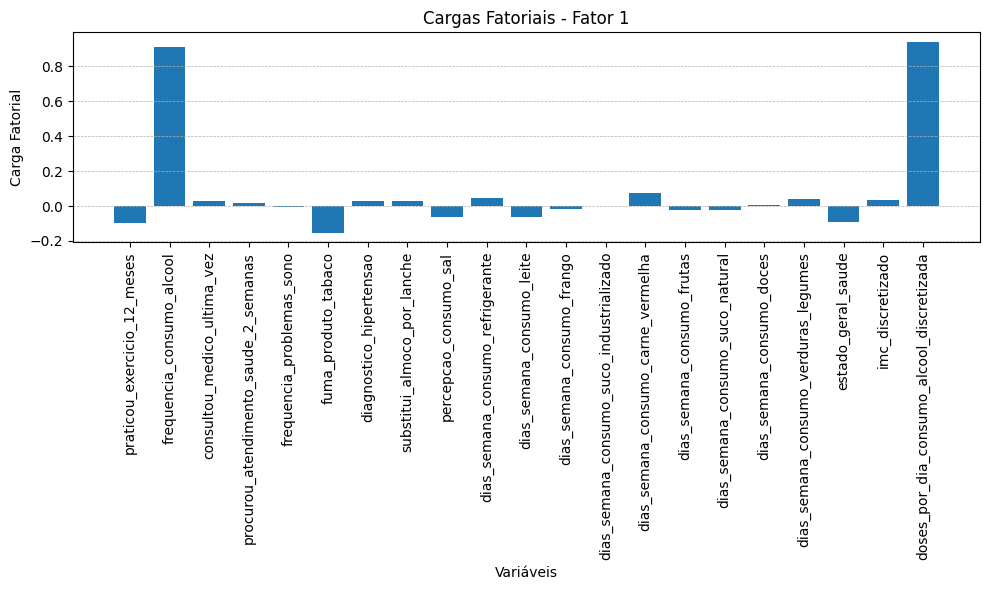

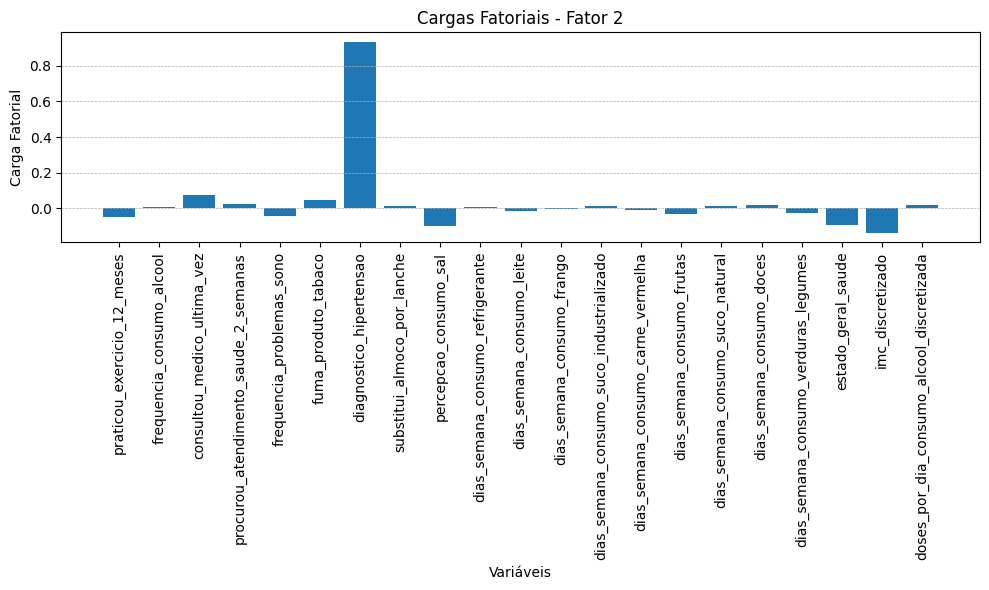

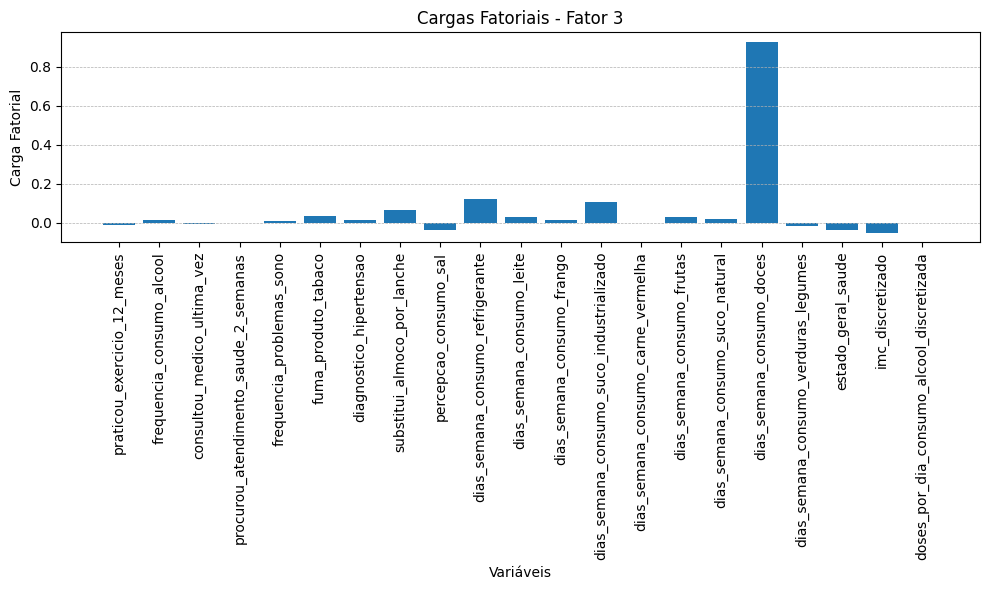

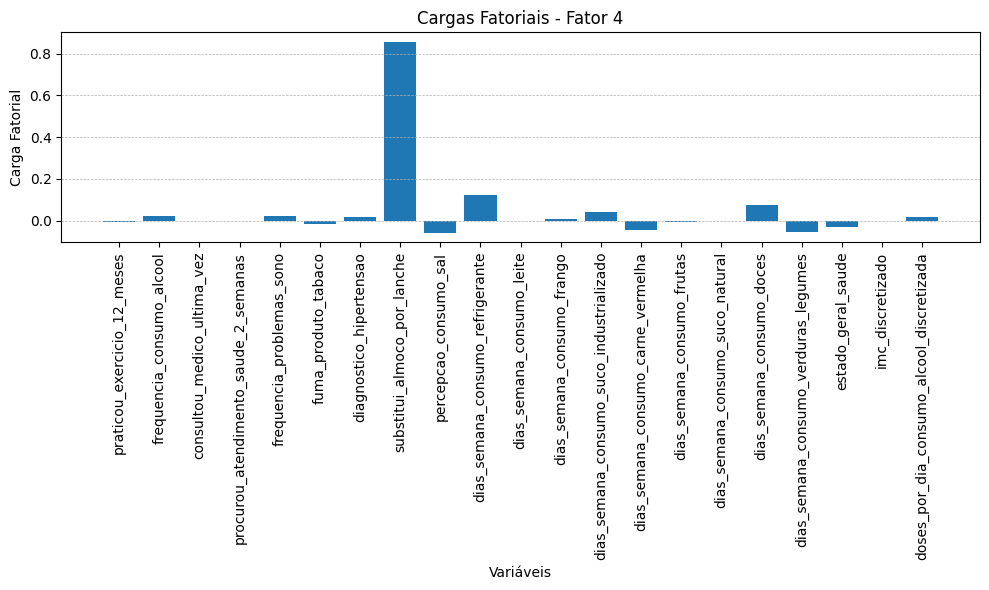

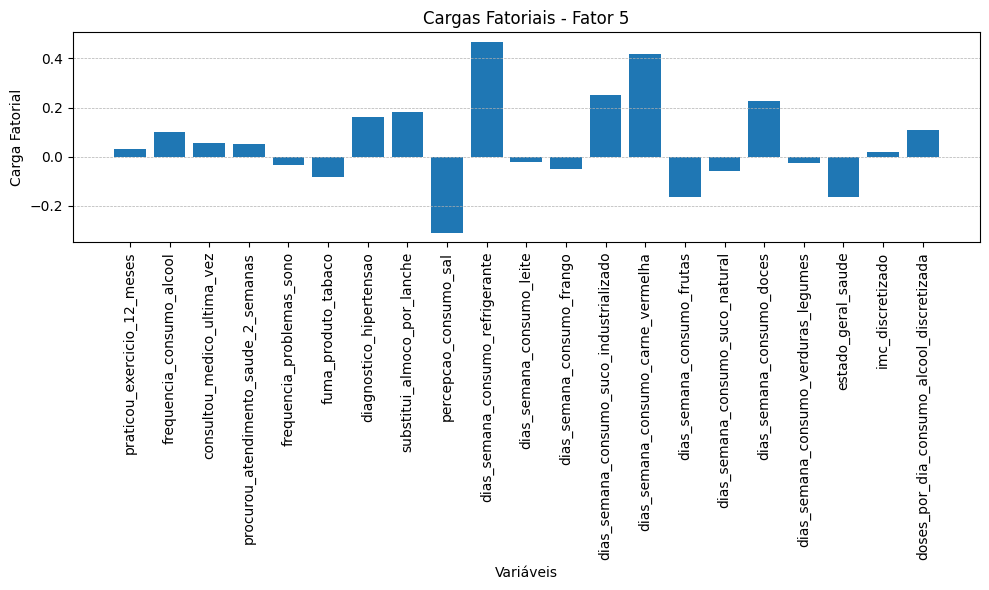

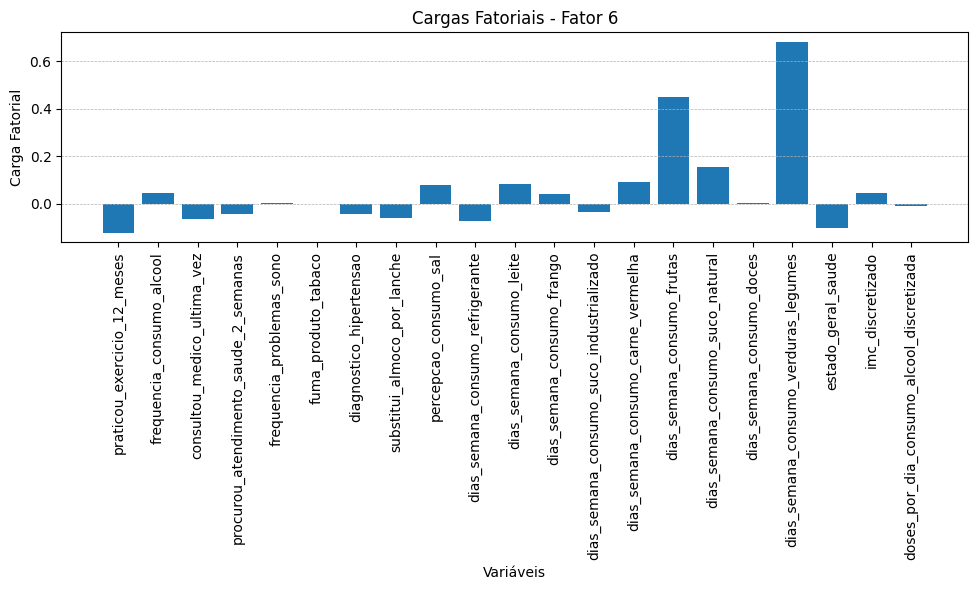

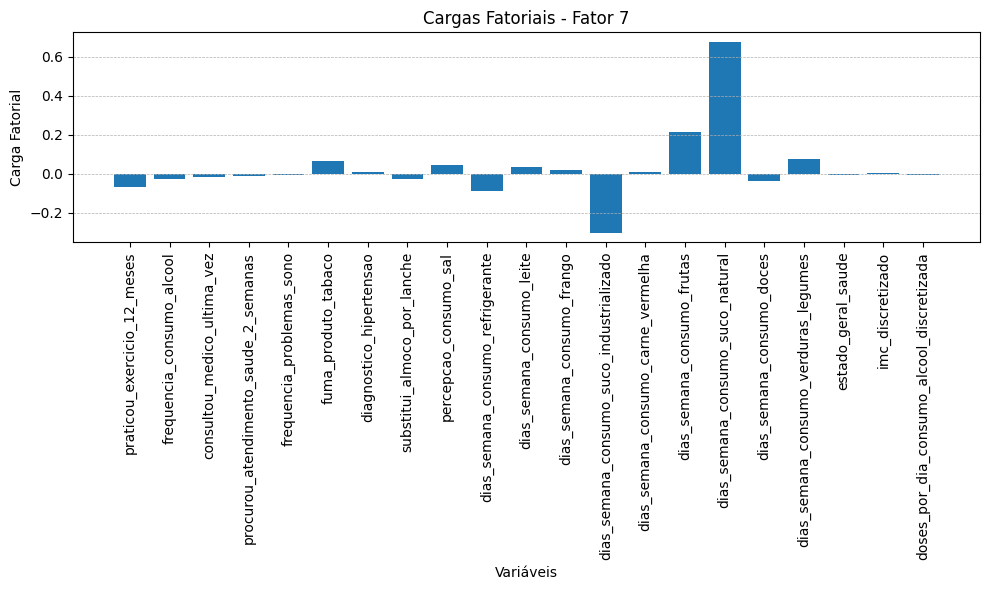

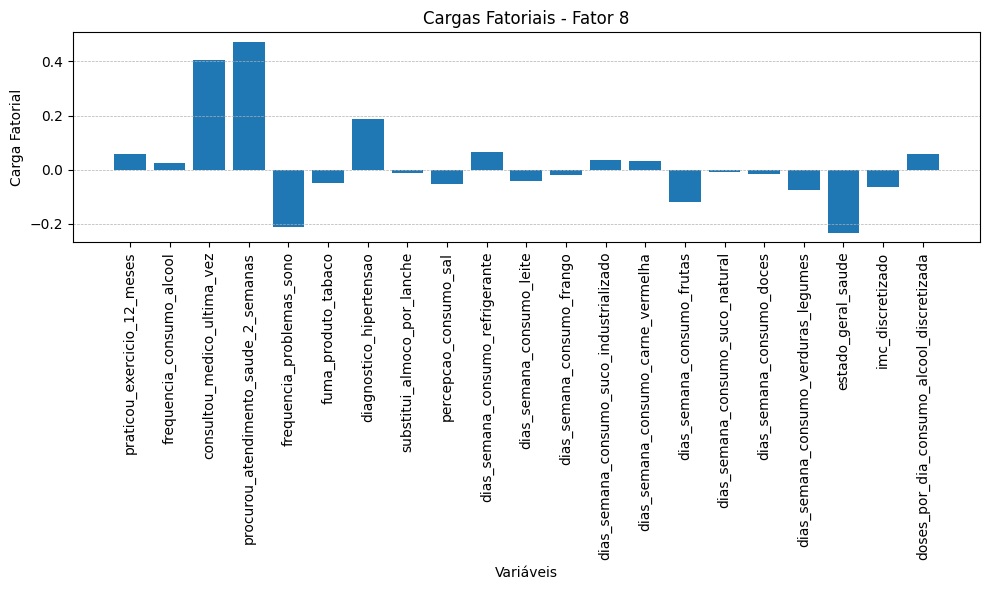

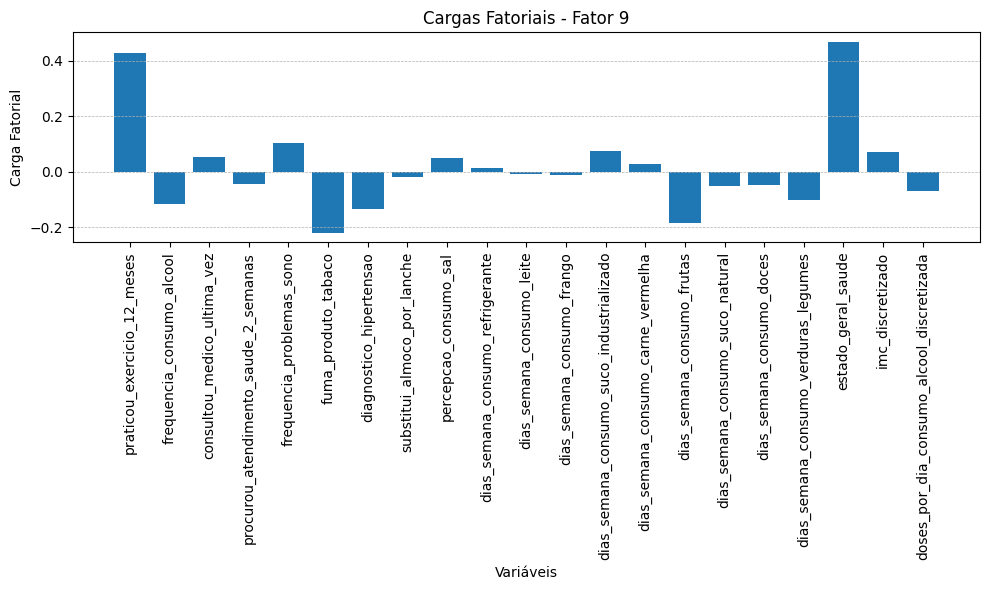

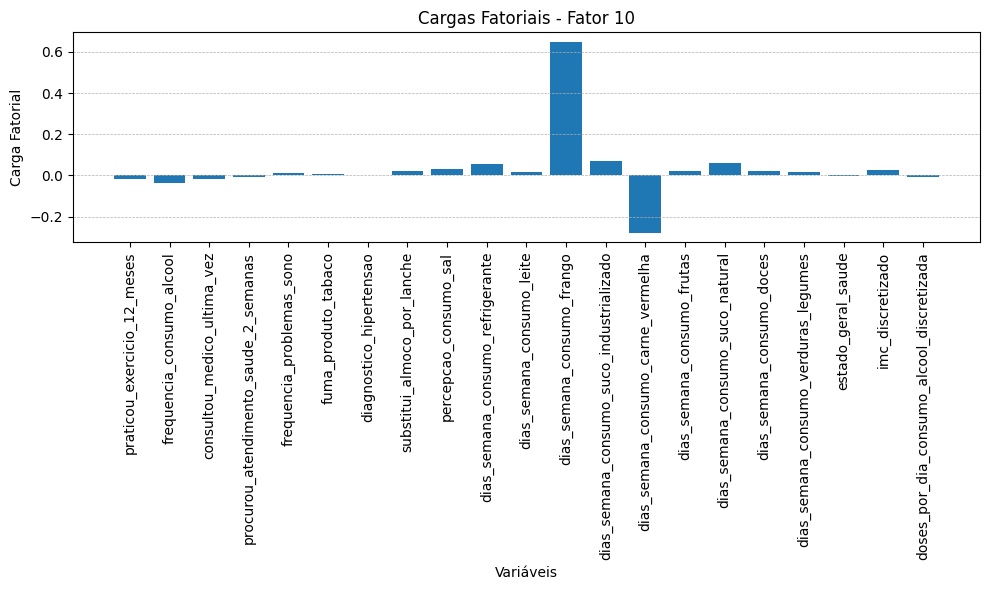

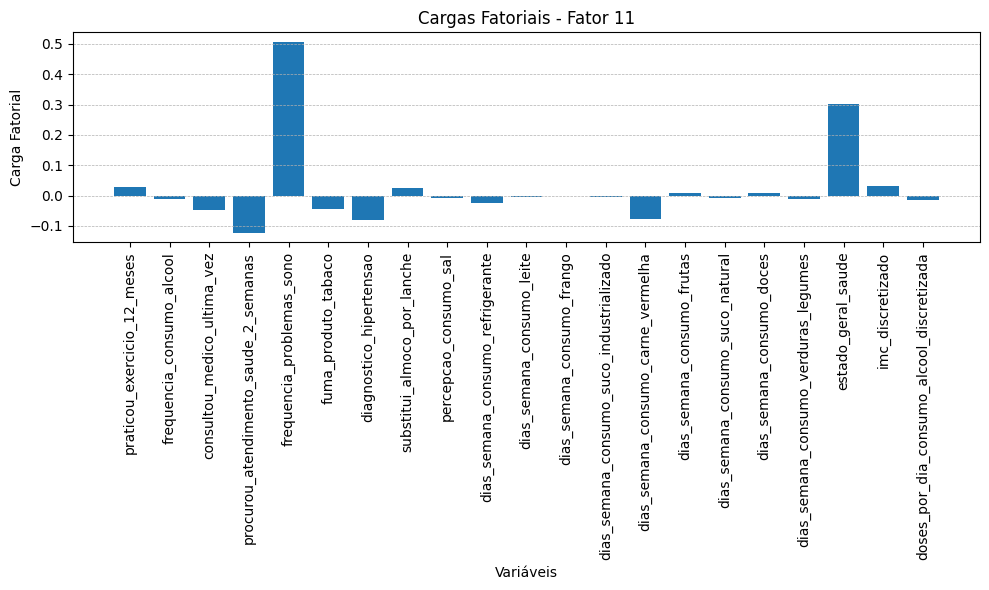

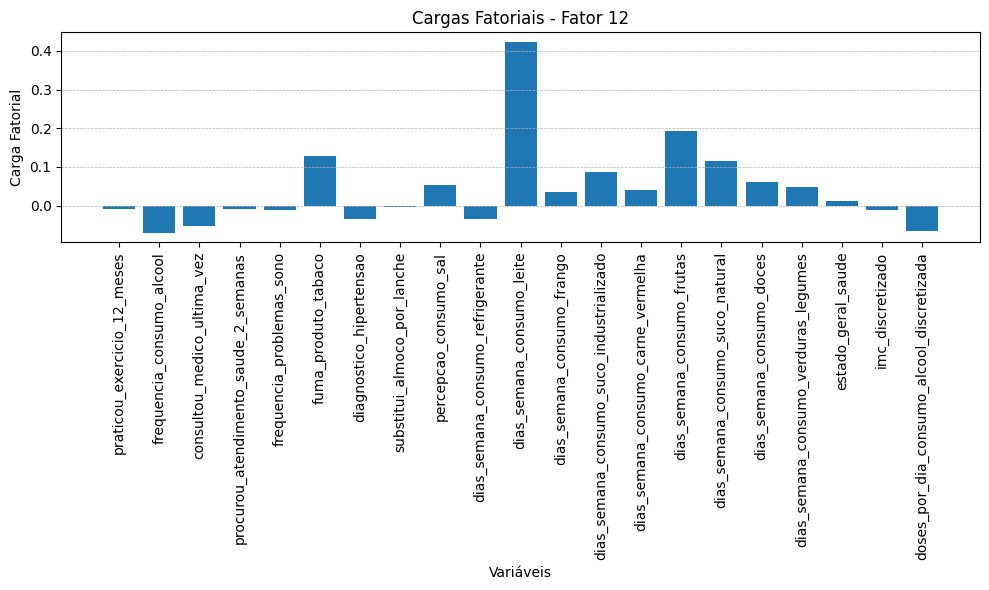

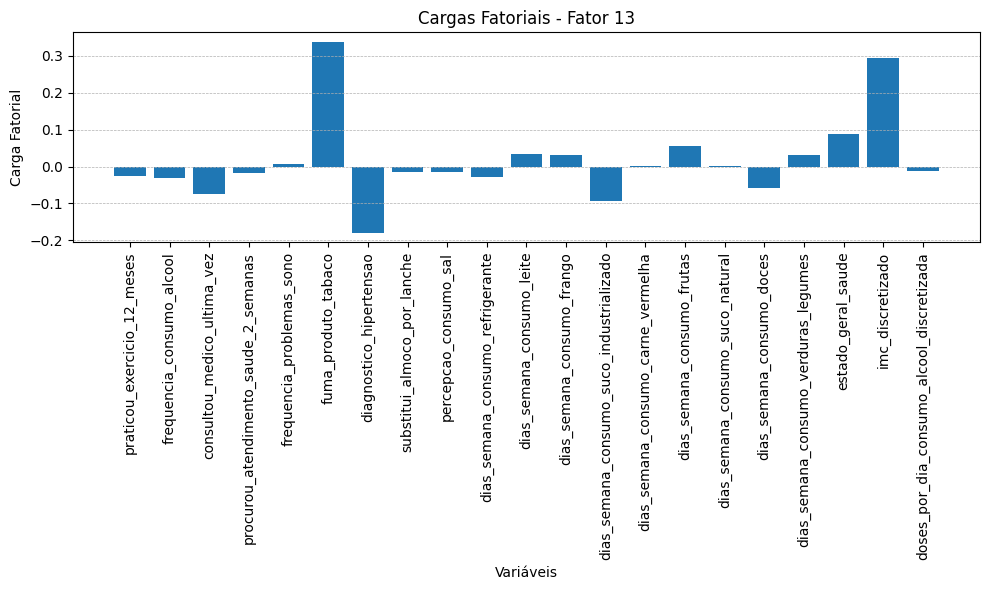

In [32]:
# Número de fatores
num_fatores = loadings_df.shape[1]

# Gerar gráficos separados para cada fator
for i in range(num_fatores):
    plt.figure(figsize=(10, 6))
    plt.bar(loadings_df.index, loadings_df.iloc[:, i])
    plt.title(f'Cargas Fatoriais - Fator {i+1}')
    plt.ylabel('Carga Fatorial')
    plt.xlabel('Variáveis')
    plt.xticks(rotation=90)
    plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()  # Ajustar o layout para evitar cortes nas labels
    plt.show()

## Salvando Fatores em um DF

In [33]:
# Obtendo as pontuações dos fatores (as variáveis latentes para cada observação)
fatores = fa.transform(df)

In [34]:
# Convertendo os fatores em um DataFrame para facilitar o salvamento
fatores_df = pd.DataFrame(fatores, columns=[f'Fator_{i+1}' for i in range(fatores.shape[1])])

In [35]:
fatores_df = fatores_df.iloc[:, :6] 
fatores_df.head()


,Fator_1,Fator_2,Fator_3,Fator_4,Fator_5,Fator_6
0,1.520139,-1.591922,-0.811102,-0.441074,0.142629,-1.125448
1,1.322148,0.334683,-0.834001,-0.448874,0.453445,-0.543644
2,0.681029,0.500919,-0.687116,-0.269251,0.039703,1.129435
3,-0.760711,0.406063,0.114462,-0.349373,-0.046438,-0.558778
4,-0.507604,-1.424384,1.531767,-0.575928,0.315165,-1.348323


#### Visualização de Clusters com UMAP

In [36]:
fatores_df['diagnostico_hipertensao'] = df['diagnostico_hipertensao']  

In [37]:
# Reduzindo os fatores para 2D com UMAP
umap_2d = umap.UMAP(n_components=2, random_state=42)
fatores_umap = umap_2d.fit_transform(fatores_df.drop('diagnostico_hipertensao', axis=1))  # Remove a coluna 'diagnostico_hipertensao' antes de aplicar o UMAP

c:\Users\maype\Desktop\projetos\Trabalho Prático AM2\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


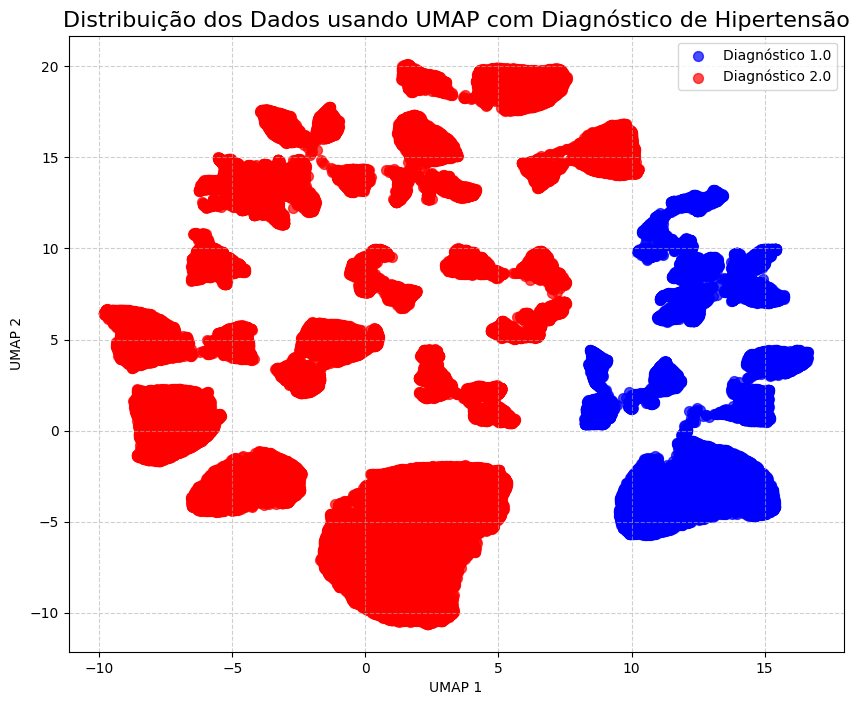

In [38]:
# Definindo cores específicas para as classes
cores = {1: 'blue', 2: 'red'}

# Plotando a distribuição com base na classe 'diagnostico_hipertensao'
plt.figure(figsize=(10, 8))
for classe in fatores_df['diagnostico_hipertensao'].unique():
    indices = fatores_df['diagnostico_hipertensao'] == classe
    plt.scatter(
        fatores_umap[indices, 0], 
        fatores_umap[indices, 1], 
        c=cores[classe], 
        label=f'Diagnóstico {classe}', 
        s=50, alpha=0.7
    )

# Adicionando título, labels e legenda
plt.title('Distribuição dos Dados usando UMAP com Diagnóstico de Hipertensão', fontsize=16)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

> Salvando fatores_df em um csv

In [44]:
fatores_df.to_csv(r'C:\Users\maype\Desktop\projetos\Trabalho Prático AM2\data\base_fatores.csv')

In [43]:
# Convertendo os fatores em um DataFrame para facilitar o salvamento
fatores_umap_df = pd.DataFrame(fatores_umap, columns=[f'Fator_{i+1}' for i in range(fatores_umap.shape[1])])
fatores_umap_df.to_csv(r'C:\Users\maype\Desktop\projetos\Trabalho Prático AM2\data\fatores_umap.csv')